In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt

In [ ]:
# Load CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# Normalize images to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to categorical format
train_labels = tf.keras.utils.to_categorical(train_labels, 100)
test_labels = tf.keras.utils.to_categorical(test_labels, 100)


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
def create_cnn_model():
    model = models.Sequential()

    # First convolutional layer
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second convolutional layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third convolutional layer
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and add fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout to prevent overfitting
    model.add(layers.Dense(100, activation='softmax'))  # 100 classes for CIFAR-100

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
# Create the model
model = create_cnn_model()

# Train the model
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 82ms/step - accuracy: 0.0267 - loss: 4.4363 - val_accuracy: 0.0994 - val_loss: 3.8953
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.0951 - loss: 3.9124 - val_accuracy: 0.1610 - val_loss: 3.5343
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.1378 - loss: 3.6173 - val_accuracy: 0.1900 - val_loss: 3.3501
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.1746 - loss: 3.4306 - val_accuracy: 0.2264 - val_loss: 3.1912
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.2055 - loss: 3.2590 - val_accuracy: 0.2550 - val_loss: 3.0163
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.2230 - loss: 3.1437 - val_accuracy: 0.2686 - val_loss: 2.9478
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.2425 - loss: 3.0375 - val_accuracy: 0.2884 - val_loss: 2.8516
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 78ms/step - accuracy: 0.2595 - loss: 2.9268 - 

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")


313/313 - 5s - 14ms/step - accuracy: 0.3757 - loss: 2.4599
Test accuracy: 0.3756999969482422


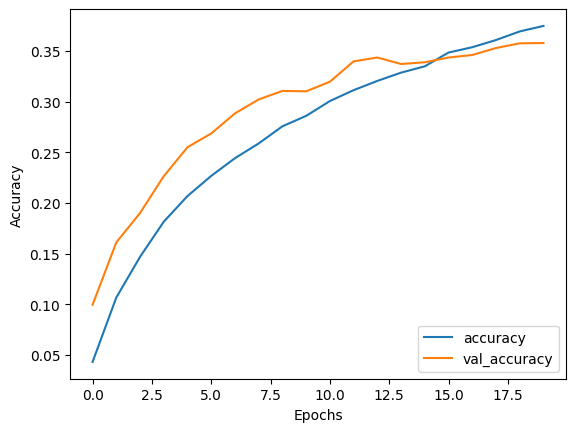

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()



169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 81ms/step - accuracy: 0.0237 - loss: 4.4849 - val_accuracy: 0.1119 - val_loss: 3.8643
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 56ms/step - accuracy: 0.0946 - loss: 3.8979 - val_accuracy: 0.1704 - val_loss: 3.5141
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.1422 - loss: 3.5991 - val_accuracy: 0.2071 - val_loss: 3.2950
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.1753 - loss: 3.3999 - val_accuracy: 0.2305 - val_loss: 3.1733
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.2005 - loss: 3.2592 - val_accuracy: 0.2675 - val_loss: 2.9940
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 55ms/step - accuracy: 0.2219 - loss: 3.1636 - val_accuracy: 0.2776 - val_loss: 2.9205
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.2423 - loss: 3.0487 - val_accuracy: 0.2882 - val_loss: 2.8773
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.2576 - loss: 2.9702 - 

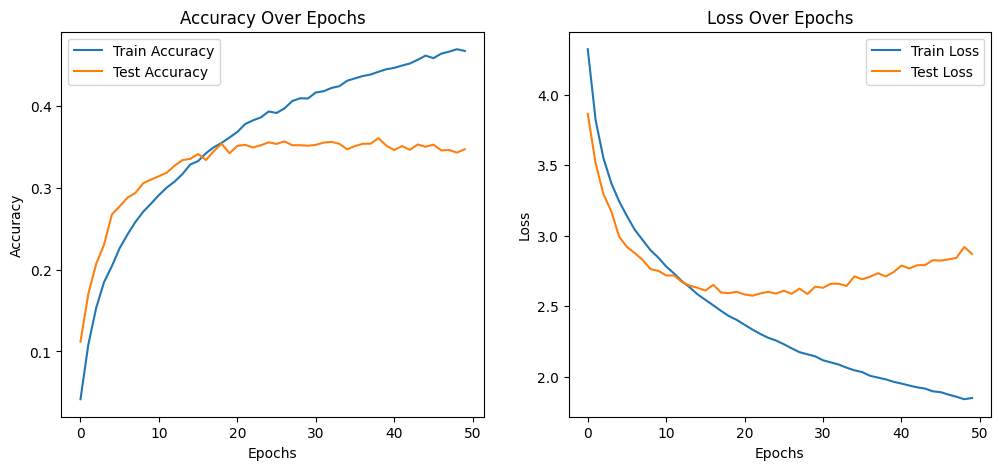

In [1]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt

# Load CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# Normalize images (scale pixel values to range [0,1])
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to categorical format (One-hot encoding)
train_labels = tf.keras.utils.to_categorical(train_labels, 100)
test_labels = tf.keras.utils.to_categorical(test_labels, 100)

# Define a custom CNN model
def create_cnn_model():
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout for regularization
    model.add(layers.Dense(100, activation='softmax'))  # Output layer (100 classes)

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create the model
model = create_cnn_model()

# Train the model
history = model.fit(train_images, train_labels, epochs=50, batch_size=64, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()


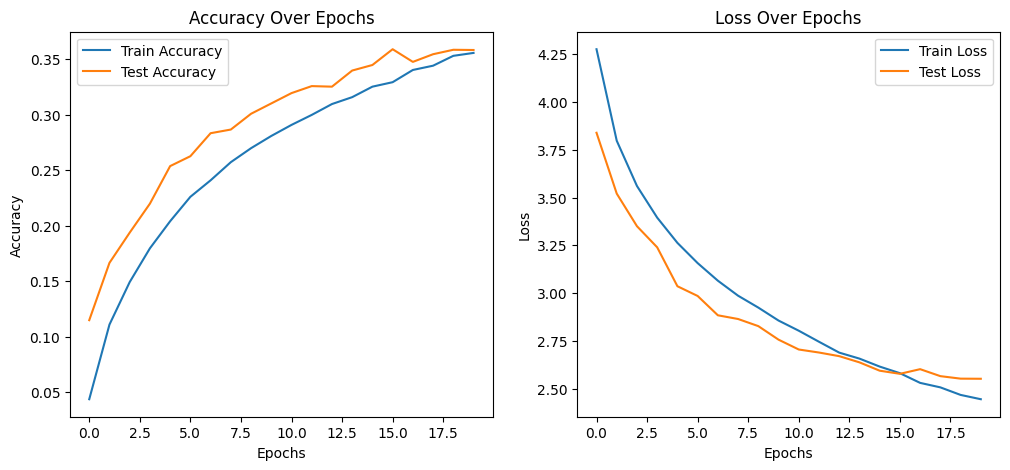

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()